# Rent Price Prediction Case Study

  'Kaizen Property Solutions' is an innovative firm focused on providing data-driven insights for rental property management and investment. The company aims to enhance the rental decision-making process for landlords, tenants, and real estate investors through advanced analytical solutions.
  
Business Challenge:
    
  - In the dynamic rental market of Pune and Mumbai, accurately predicting rental prices is crucial for maximizing occupancy rates and optimizing rental income. However, property managers and landlords often face challenges in estimating rental prices due to various influencing factors, including property characteristics, location, and local market trends specific to these metropolitan areas.





Objective:
  - To tackle this challenge, 'Kaizen Property Solutions' is conducting a machine learning case study aimed at developing a predictive model for estimating rental prices based on a comprehensive dataset that includes the following features: house_type, house_size, location, city (specifically Pune and Mumbai), latitude, longitude, price, currency, numBathrooms, numBalconies, isNegotiable, priceSqFt, verificationDate, description, SecurityDeposit, and Status.


In [8]:
from google.colab import drive
drive.mount('/content/Myfiles')

Drive already mounted at /content/Myfiles; to attempt to forcibly remount, call drive.mount("/content/Myfiles", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

In [10]:
 pune=pd.read_csv('/content/Myfiles/MyDrive/Indian_housing_Pune_data.csv')
 mumbai=pd.read_csv('/content/Myfiles/MyDrive/Indian_housing_Mumbai_data.csv')

In [11]:
pune.head(1)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,906 sq ft,Lohegaon,Pune,18.60582,73.912407,12000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished


In [12]:
pune.shape

(3910, 16)

In [13]:
mumbai.head(1)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,"1,180 sq ft",Ulwe,Mumbai,18.971046,73.017723,19000,INR,2.0,NaN,NaN,NaN,Posted 2 years ago,It has area of 1180 sqft and is available at a...,No Deposit,Furnished


In [14]:
mumbai.shape

(5000, 16)

In [15]:
# Data Understanding and Quality issues
#house_type ->replace Floor to House


#house_size->remove , and sqft convert to numerical data


#location->Checking for spelling mistake in location

#City-> no problem
# latitude longitude --> drop
#Pirce-> no problem

# currency-> drop

#numBathrooms-> convert to int
# numnumBalconies
#	isNegotiable--> Yes,no

#Drop sqftprice

#Drop/use verification
#Discription - needs more research/drop it
#Deposit--> convert to numerical, replace nodeposit with zero.
#status--->No problem

In [16]:
df=pd.concat([pune,mumbai],ignore_index=True)

In [17]:
df.isna().sum() #checking missing values data

,0
house_type,0
house_size,0
location,0
city,0
latitude,0
longitude,0
price,0
currency,0
numBathrooms,31
numBalconies,6356


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        8910 non-null   object 
 1   house_size        8910 non-null   object 
 2   location          8910 non-null   object 
 3   city              8910 non-null   object 
 4   latitude          8910 non-null   float64
 5   longitude         8910 non-null   float64
 6   price             8910 non-null   int64  
 7   currency          8910 non-null   object 
 8   numBathrooms      8879 non-null   float64
 9   numBalconies      2554 non-null   float64
 10  isNegotiable      1097 non-null   object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  8910 non-null   object 
 13  description       8364 non-null   object 
 14  SecurityDeposit   8910 non-null   object 
 15  Status            8910 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [19]:
# Creating function to clean housesize column
import re
def clean_House_Size(text):
  x = re.sub(',','',text)
  y = re.sub('sq ft','',x)
  return y.strip()


In [20]:
df['house_size']

,house_size
0,906 sq ft
1,650 sq ft
2,350 sq ft
3,"1,500 sq ft"
4,"5,000 sq ft"
...,...
8905,800 sq ft
8906,"1,200 sq ft"
8907,"1,040 sq ft"
8908,"1,930 sq ft"


In [21]:
df['house_size']=df['house_size'].apply(clean_House_Size).astype('int')

In [22]:
df['house_size']

,house_size
0,906
1,650
2,350
3,1500
4,5000
...,...
8905,800
8906,1200
8907,1040
8908,1930


In [23]:
text1 = df['description'].iloc[2]

In [24]:
text1

'This spacious 1 rk independent house is available for rental and is located in the heart of Wagholi. It has an area of 350 sqft with a carpet area of 300 sqft . The property is available at a monthly rental of Rs. 4,500 . This residential property is ready-to-move-in. It is made in way to provide a comfortable living for the residents. Contact us for more details. '

In [25]:
re.findall('[\d]+',text1)[2]#used in regular expressions (regex) to match strings that contain digits


'300'

In [26]:
# Dropping unnecessary col
df1 = df.drop(columns=['latitude','longitude','currency','priceSqFt','verificationDate','description'])

In [27]:
df1

,house_type,house_size,location,city,price,numBathrooms,numBalconies,isNegotiable,SecurityDeposit,Status
0,2 BHK Apartment,906,Lohegaon,Pune,12000,2.0,NaN,NaN,No Deposit,Unfurnished
1,1 BHK Apartment,650,Anand Nagar,Pune,11000,1.0,NaN,NaN,No Deposit,Semi-Furnished
2,1 RK Studio Apartment,350,Wagholi,Pune,4500,1.0,NaN,NaN,No Deposit,Unfurnished
3,3 BHK Apartment,1500,Sangamvadi,Pune,35000,2.0,NaN,NaN,No Deposit,Furnished
4,5 BHK Independent House,5000,Wadgaon Sheri,Pune,110000,5.0,NaN,NaN,No Deposit,Unfurnished
...,...,...,...,...,...,...,...,...,...,...
8905,2 BHK Apartment,800,Saki Naka,Mumbai,46000,2.0,NaN,NaN,"1,50,000",Unfurnished
8906,2 BHK Apartment,1200,Malad West,Mumbai,55000,2.0,NaN,NaN,"2,50,000",Semi-Furnished
8907,2 BHK Apartment,1040,Goregaon West,Mumbai,44000,2.0,NaN,NaN,"2,00,000",Unfurnished
8908,3 BHK Apartment,1930,Kharghar,Mumbai,65000,3.0,NaN,NaN,"2,00,000",Furnished


**SecurityDeposit**

In [28]:

df1['SecurityDeposit']

,SecurityDeposit
0,No Deposit
1,No Deposit
2,No Deposit
3,No Deposit
4,No Deposit
...,...
8905,"1,50,000"
8906,"2,50,000"
8907,"2,00,000"
8908,"2,00,000"


In [29]:
def clean_Security_Deposit(text):
  return re.sub(',','',text)

In [30]:
df1['SecurityDeposit']=df1['SecurityDeposit'].apply(clean_Security_Deposit)

In [31]:
# change no Deposit to insert value for 0
df1['SecurityDeposit']=np.where(df1['SecurityDeposit']=='No Deposit',0,df1['SecurityDeposit'])

In [32]:
# changing data type object to int
df1['SecurityDeposit']=df1['SecurityDeposit'].astype('int')

In [33]:
df1['SecurityDeposit']

,SecurityDeposit
0,0
1,0
2,0
3,0
4,0
...,...
8905,150000
8906,250000
8907,200000
8908,200000


In [34]:
df1

,house_type,house_size,location,city,price,numBathrooms,numBalconies,isNegotiable,SecurityDeposit,Status
0,2 BHK Apartment,906,Lohegaon,Pune,12000,2.0,NaN,NaN,0,Unfurnished
1,1 BHK Apartment,650,Anand Nagar,Pune,11000,1.0,NaN,NaN,0,Semi-Furnished
2,1 RK Studio Apartment,350,Wagholi,Pune,4500,1.0,NaN,NaN,0,Unfurnished
3,3 BHK Apartment,1500,Sangamvadi,Pune,35000,2.0,NaN,NaN,0,Furnished
4,5 BHK Independent House,5000,Wadgaon Sheri,Pune,110000,5.0,NaN,NaN,0,Unfurnished
...,...,...,...,...,...,...,...,...,...,...
8905,2 BHK Apartment,800,Saki Naka,Mumbai,46000,2.0,NaN,NaN,150000,Unfurnished
8906,2 BHK Apartment,1200,Malad West,Mumbai,55000,2.0,NaN,NaN,250000,Semi-Furnished
8907,2 BHK Apartment,1040,Goregaon West,Mumbai,44000,2.0,NaN,NaN,200000,Unfurnished
8908,3 BHK Apartment,1930,Kharghar,Mumbai,65000,3.0,NaN,NaN,200000,Furnished


**numBathrooms**

In [35]:
# check missing value
df1['numBathrooms'].isna().sum()

31

In [36]:
# filling missing value in 1
df1['numBathrooms'].fillna(1,inplace=True)

In [37]:
# changing data type
df1['numBathrooms']=df1['numBathrooms'].astype('int')

**numBalconies**

In [38]:
# checking missing value
df1['numBalconies'].isna().sum()

6356

In [39]:
df1['numBalconies'].dtype

dtype('float64')

In [40]:
# changing data type
df1['numBalconies']=df1['numBalconies'].astype('object')

In [41]:
df1.groupby('numBalconies')['price'].median()

,price
numBalconies,
1.0,17000.0
2.0,18000.0
3.0,29500.0
4.0,44000.0
5.0,60000.0
6.0,888000.0


**Handle House Type**

In [42]:
text = df1['house_type'].head(1)[0]
text

'2 BHK Apartment '

In [43]:
text=text.strip()
text

'2 BHK Apartment'

In [44]:
def house_type_cleaning(text):
  text = text.strip()
  return re.sub(' ','_',text)

In [45]:
df1['house_type']=df1['house_type'].apply(house_type_cleaning)

In [46]:
df1['house_type']

,house_type
0,2_BHK_Apartment
1,1_BHK_Apartment
2,1_RK_Studio_Apartment
3,3_BHK_Apartment
4,5_BHK_Independent_House
...,...
8905,2_BHK_Apartment
8906,2_BHK_Apartment
8907,2_BHK_Apartment
8908,3_BHK_Apartment


In [47]:
# filling missing value for 1 and 2
import numpy as np

df1['numBalconies'] = np.where(df1['house_type'] == '2_BHK_Apartment',
                             df1['numBalconies'].fillna(1),
                             df1['numBalconies'].fillna(2))

In [48]:
df1

,house_type,house_size,location,city,price,numBathrooms,numBalconies,isNegotiable,SecurityDeposit,Status
0,2_BHK_Apartment,906,Lohegaon,Pune,12000,2,1.0,NaN,0,Unfurnished
1,1_BHK_Apartment,650,Anand Nagar,Pune,11000,1,2.0,NaN,0,Semi-Furnished
2,1_RK_Studio_Apartment,350,Wagholi,Pune,4500,1,2.0,NaN,0,Unfurnished
3,3_BHK_Apartment,1500,Sangamvadi,Pune,35000,2,2.0,NaN,0,Furnished
4,5_BHK_Independent_House,5000,Wadgaon Sheri,Pune,110000,5,2.0,NaN,0,Unfurnished
...,...,...,...,...,...,...,...,...,...,...
8905,2_BHK_Apartment,800,Saki Naka,Mumbai,46000,2,1.0,NaN,150000,Unfurnished
8906,2_BHK_Apartment,1200,Malad West,Mumbai,55000,2,1.0,NaN,250000,Semi-Furnished
8907,2_BHK_Apartment,1040,Goregaon West,Mumbai,44000,2,1.0,NaN,200000,Unfurnished
8908,3_BHK_Apartment,1930,Kharghar,Mumbai,65000,3,2.0,NaN,200000,Furnished


In [49]:
df['description']

,description
0,A spacious 2 bhk multistorey apartment is avai...
1,It has a built-up area of 650 sqft and is avai...
2,This spacious 1 rk independent house is availa...
3,"Furnishings include 1 tv, 1 refrigerator, 1 so..."
4,Itâs a 5 bhk independent house situated in W...
...,...
8905,Gundecha asta complex. Andheri East. sakinaka ...
8906,It has an area of 1200 sqft . The property is ...
8907,It is located on the 7th floor(out of a total ...
8908,"It is a furnished property. It has 1 wardrobe,..."


In [50]:
df1['isNegotiable']=np.where(df1['isNegotiable']=='Negotiable','Yes','No')

In [51]:
df1.isna().sum()

,0
house_type,0
house_size,0
location,0
city,0
price,0
numBathrooms,0
numBalconies,0
isNegotiable,0
SecurityDeposit,0
Status,0


**Exploratory Data Analysis(EDA)**

In [52]:
# to find shape of the data
df1.shape

(8910, 10)

In [53]:
df1.groupby('price')['house_type'].sum()

,house_type
price,
1500,1_BHK_Independent_Floor
2800,1_BHK_Apartment
3000,1_RK_Studio_Apartment1_RK_Studio_Apartment1_RK...
3004,1_BHK_Apartment
3500,1_RK_Studio_Apartment1_RK_Studio_Apartment1_RK...
...,...
1000000,4_BHK_Apartment4_BHK_Apartment4_BHK_Apartment
1100000,4_BHK_Apartment
1176000,6_BHK_Villa6_BHK_Villa


<Axes: >

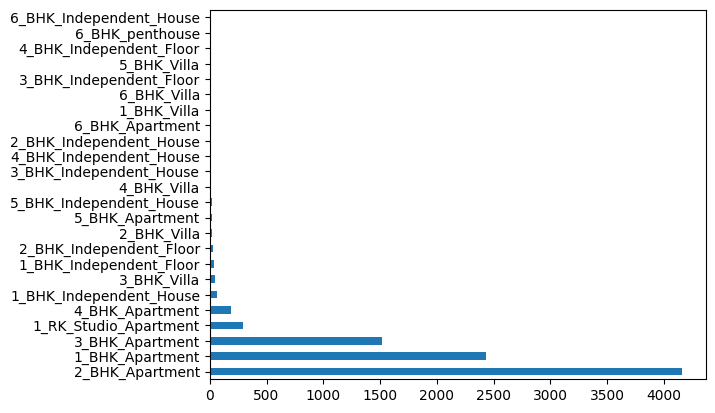

In [54]:
df1['house_type'].value_counts().plot(kind='barh')

**most of the house_types are of 1 ,2, 3 bhk an 1 RK apartments, will make another category for other house_types**

In [55]:
# to get columns of dataframe
df1.columns

Index(['house_type', 'house_size', 'location', 'city', 'price', 'numBathrooms',
       'numBalconies', 'isNegotiable', 'SecurityDeposit', 'Status'],
      dtype='object')

In [56]:
df1['house_size']

,house_size
0,906
1,650
2,350
3,1500
4,5000
...,...
8905,800
8906,1200
8907,1040
8908,1930


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt



<function matplotlib.pyplot.show(close=None, block=None)>

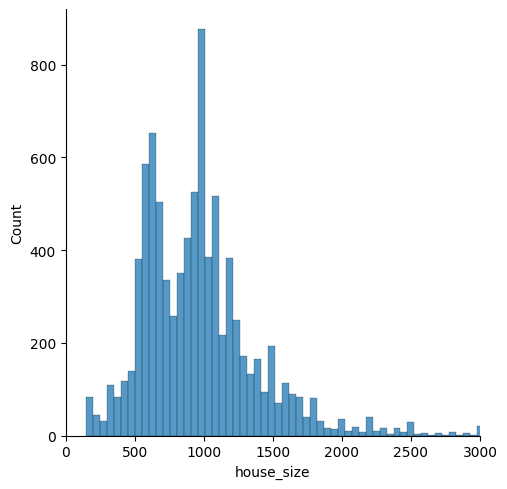

In [58]:
sns.displot(df1['house_size'])
plt.xlim(0,3000)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

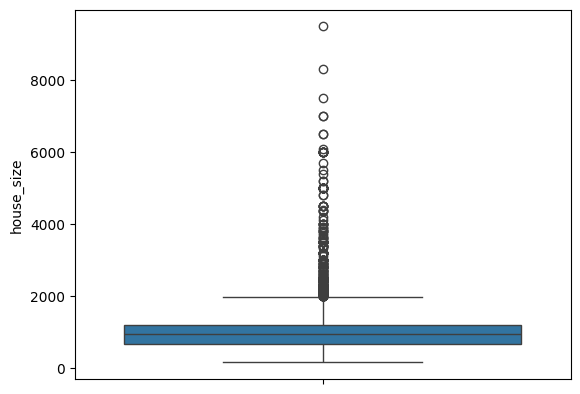

In [59]:
sns.boxplot(df['house_size'])
plt.show

**it seems that most of the houses having square feet area below 2000**

**There are outliers present in house_size**

In [60]:
#to get summary stats
df1['house_size'].describe()

,house_size
count,8910.000000
mean,1015.904153
std,581.623014
min,150.000000
25%,655.000000
50%,950.000000
75%,1180.000000
max,9500.000000


**almost 75% houses in data having area below 1180 sqfeets**

**Data is +vely skewed**

**Outliers are present in house_sizes**

<Axes: >

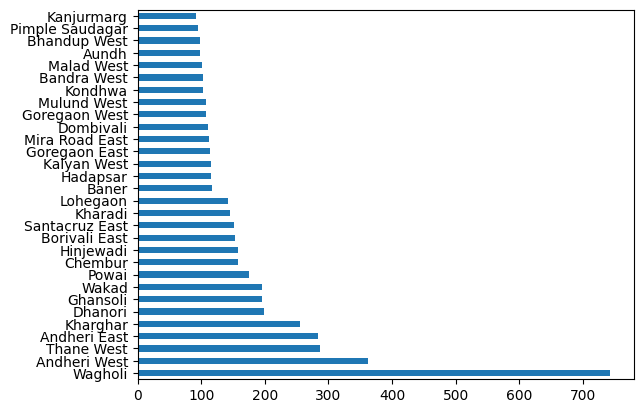

In [61]:
df1['location'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')

**most of the houses are from wagholi Area, we will take only those locations having count greater than 100**

**will make another cateory for others**

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   house_type       8910 non-null   object 
 1   house_size       8910 non-null   int64  
 2   location         8910 non-null   object 
 3   city             8910 non-null   object 
 4   price            8910 non-null   int64  
 5   numBathrooms     8910 non-null   int64  
 6   numBalconies     8910 non-null   float64
 7   isNegotiable     8910 non-null   object 
 8   SecurityDeposit  8910 non-null   int64  
 9   Status           8910 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 696.2+ KB


In [63]:
df1

,house_type,house_size,location,city,price,numBathrooms,numBalconies,isNegotiable,SecurityDeposit,Status
0,2_BHK_Apartment,906,Lohegaon,Pune,12000,2,1.0,No,0,Unfurnished
1,1_BHK_Apartment,650,Anand Nagar,Pune,11000,1,2.0,No,0,Semi-Furnished
2,1_RK_Studio_Apartment,350,Wagholi,Pune,4500,1,2.0,No,0,Unfurnished
3,3_BHK_Apartment,1500,Sangamvadi,Pune,35000,2,2.0,No,0,Furnished
4,5_BHK_Independent_House,5000,Wadgaon Sheri,Pune,110000,5,2.0,No,0,Unfurnished
...,...,...,...,...,...,...,...,...,...,...
8905,2_BHK_Apartment,800,Saki Naka,Mumbai,46000,2,1.0,No,150000,Unfurnished
8906,2_BHK_Apartment,1200,Malad West,Mumbai,55000,2,1.0,No,250000,Semi-Furnished
8907,2_BHK_Apartment,1040,Goregaon West,Mumbai,44000,2,1.0,No,200000,Unfurnished
8908,3_BHK_Apartment,1930,Kharghar,Mumbai,65000,3,2.0,No,200000,Furnished


<Axes: >

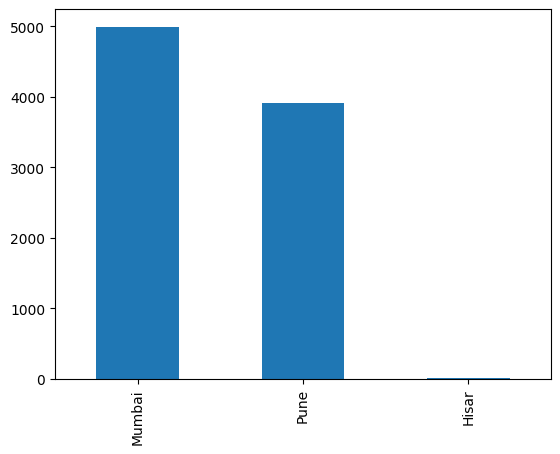

In [64]:
# City wise data
df1['city'].value_counts().plot(kind='bar')

<Axes: >

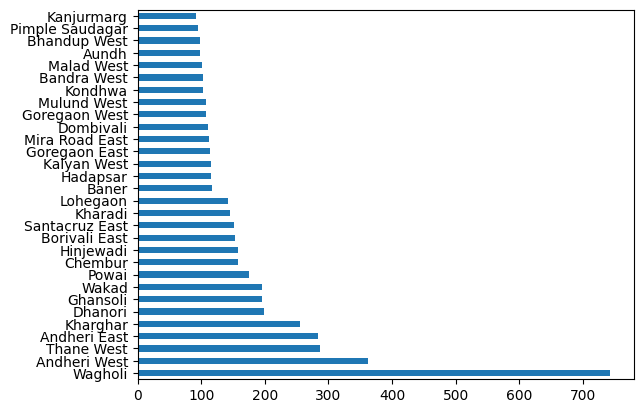

In [65]:
# location vise data top 30
df1['location'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')

(0.0, 40000.0)

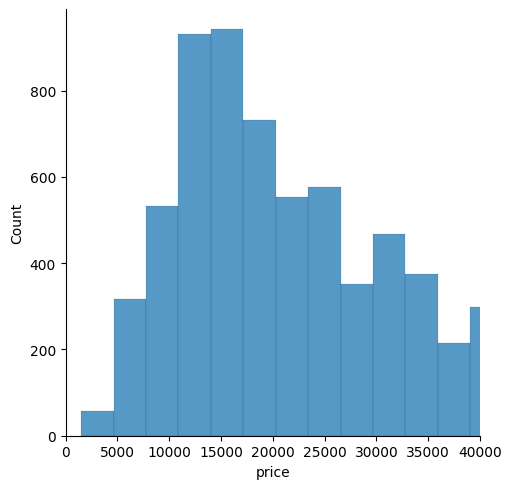

In [66]:
sns.displot(df1['price'])
plt.xlim(0,40000)

In [67]:
df1['price'].describe()

,price
count,8.910000e+03
mean,4.470550e+04
std,7.051742e+04
min,1.500000e+03
25%,1.550000e+04
50%,2.500000e+04
75%,4.800000e+04
max,1.200000e+06


**Data is skewed**

**75% of houses having price below 25000**

**Outliers are present in data**

<Axes: >

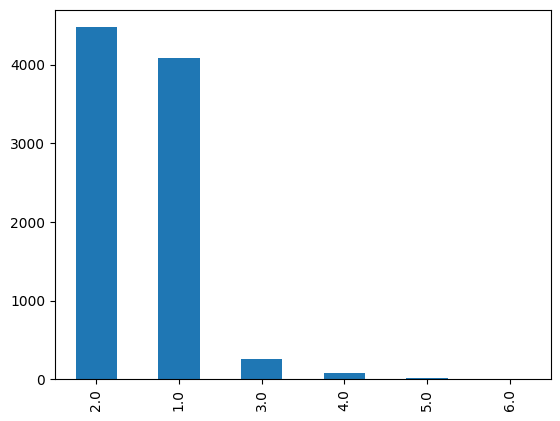

In [68]:
df1['numBalconies'].value_counts().plot(kind='bar')

**most of the balconies 1 and 2**

In [69]:
df1['numBalconies'].describe()

,numBalconies
count,8910.000000
mean,1.594052
std,0.614003
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,6.000000


<Axes: ylabel='isNegotiable'>

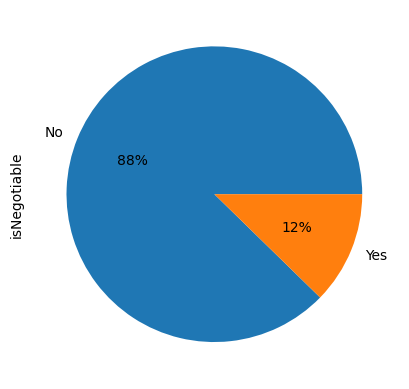

In [70]:
df1['isNegotiable'].value_counts().plot(kind='pie',autopct='%0.0f%%')

**the data is rent is 88 per  no negotiable**

**the data rent is 12 per data is negotiablebold text**

(0.0, 100000.0)

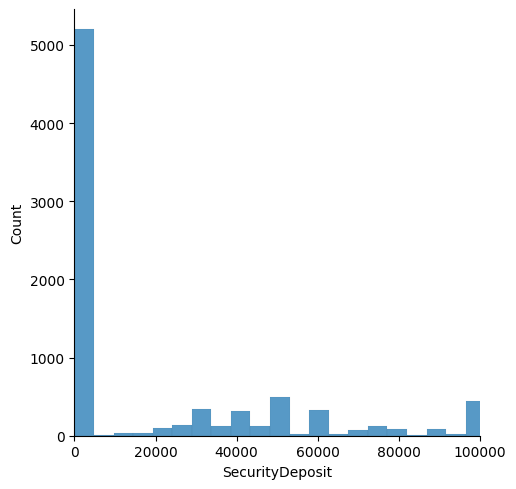

In [71]:
import matplotlib.pyplot as plt
sns.displot(df1['SecurityDeposit'])
plt.xlim(0,100000)

**50% houses do not required security deposit**

**50% houses having security deposit 20000 to 1000000**

In [72]:
df1['SecurityDeposit'].describe()

,SecurityDeposit
count,8.910000e+03
mean,4.650700e+04
std,1.714919e+05
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,5.000000e+04
max,6.000000e+06


<Axes: ylabel='Status'>

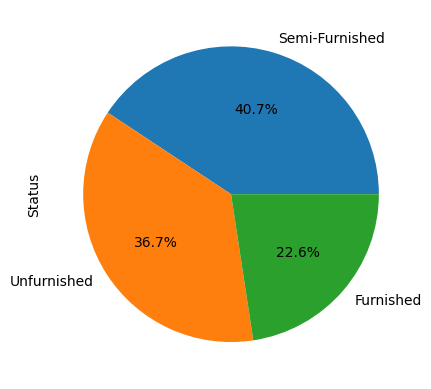

In [73]:
df1['Status'].value_counts().plot(kind='pie',autopct='%0.1f%%')

**the data status is semi-furnished for 40 % data**

**the data status is unfornished for 36 % data**

**the data is status furnished for 22% data**

<Axes: ylabel='numBathrooms'>

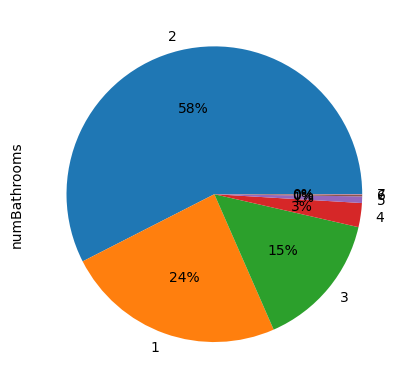

In [74]:
df1['numBathrooms'].value_counts().plot(kind='pie',autopct="%0.f%%")

**97% houses having number of bathrooms 1 to 3**

**Bivariate Analysis**

In [75]:
df1.columns

Index(['house_type', 'house_size', 'location', 'city', 'price', 'numBathrooms',
       'numBalconies', 'isNegotiable', 'SecurityDeposit', 'Status'],
      dtype='object')

<Axes: ylabel='house_type'>

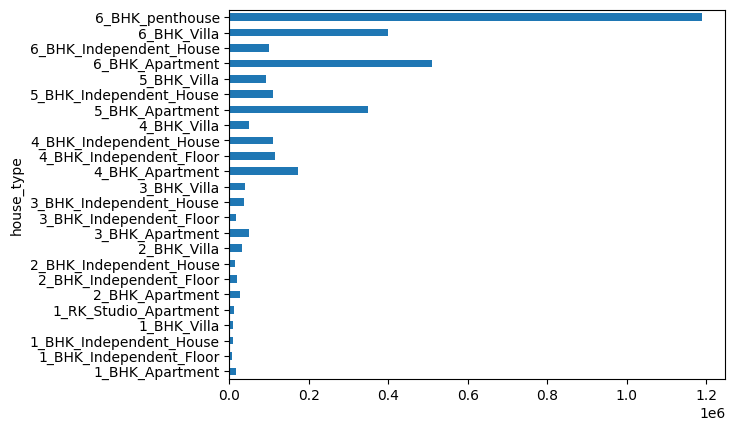

In [76]:
#house and price
#Rent price for house type is significantly different
df1.groupby('house_type')['price'].median().plot(kind='barh')

**Rent price for house type is significantly different**

<Axes: xlabel='house_size', ylabel='price'>

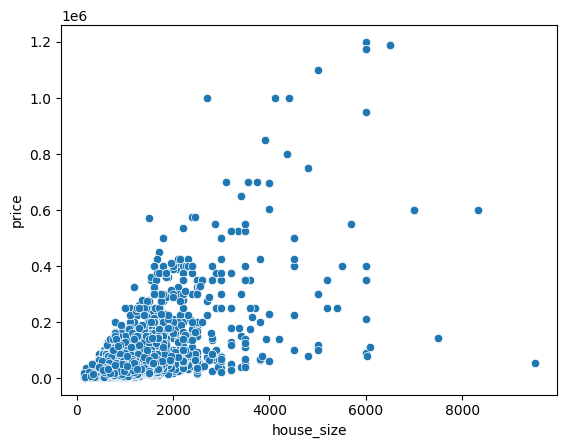

In [77]:
#house Size and price
sns.scatterplot(x=df1['house_size'],y=df1['price'])

**There is increasing trend between house_size and rent**

In [78]:
df1[['house_size','price']].corr()

,house_size,price
house_size,1.000000,0.610385
price,0.610385,1.000000


**there is moderate level postive correlation between price and house_size**

(0.0, 60000.0)

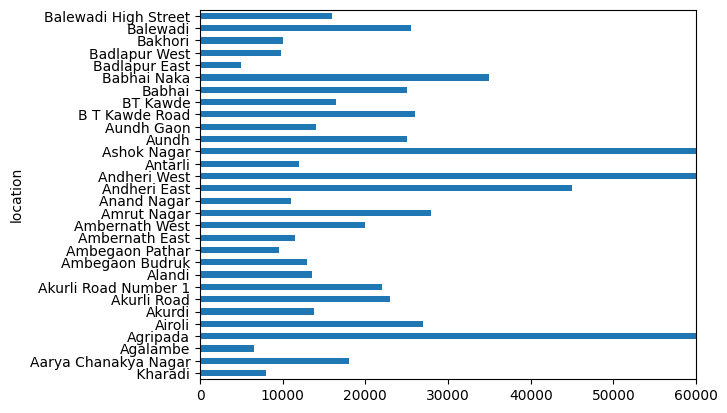

In [79]:
#location and price
df1.groupby('location')['price'].median().head(30).plot(kind='barh')
plt.xlim(0,60000)

**rent is strongly depend on location**

<Axes: ylabel='numBathrooms'>

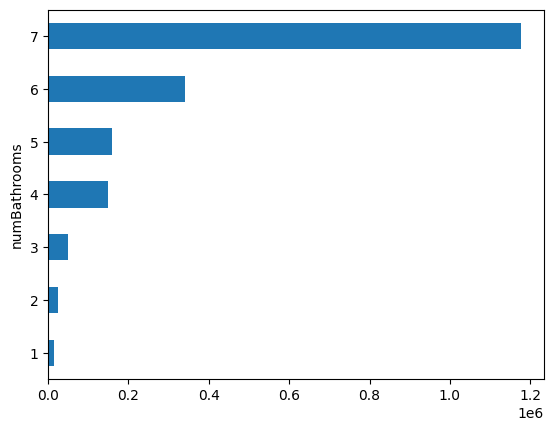

In [80]:
#bathrooms and price
df1.groupby('numBathrooms')['price'].median().plot(kind='barh')

**number of bathrooms having singinificant impact on rent price**

<Axes: ylabel='numBalconies'>

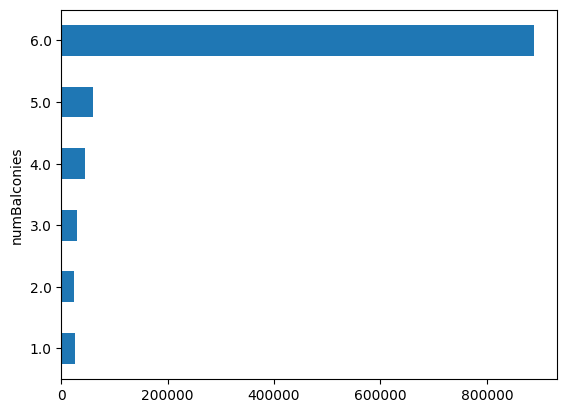

In [81]:
# Balconies and price
df1.groupby('numBalconies')['price'].median().plot(kind='barh')

In [82]:
df1['numBalconies'].value_counts()

,numBalconies
2.0,4475
1.0,4083
3.0,259
4.0,76
5.0,13
6.0,4


**# Apply anova excluding 5 and 6 balconies**

<Axes: ylabel='price'>

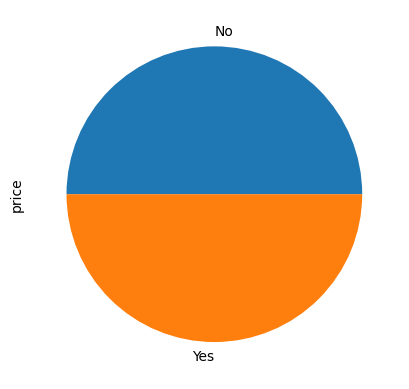

In [83]:
df1.groupby('isNegotiable')['price'].median().plot(kind='pie')

In [84]:
df1.columns

Index(['house_type', 'house_size', 'location', 'city', 'price', 'numBathrooms',
       'numBalconies', 'isNegotiable', 'SecurityDeposit', 'Status'],
      dtype='object')

<Axes: xlabel='SecurityDeposit', ylabel='price'>

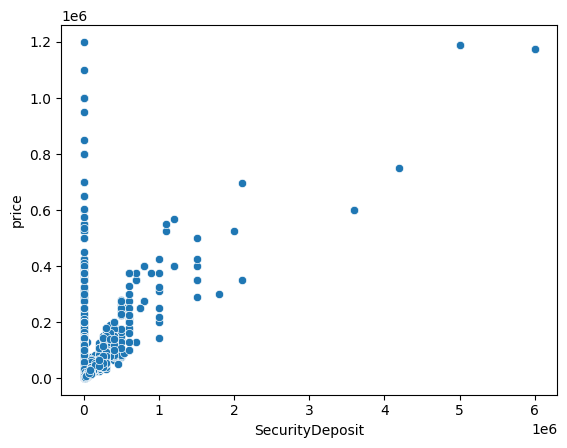

In [85]:
# securitydeposit and price
sns.scatterplot(x=df1['SecurityDeposit'],y=df1['price'])

**There is Positive correlation between price and security deposit**

<Axes: xlabel='Status'>

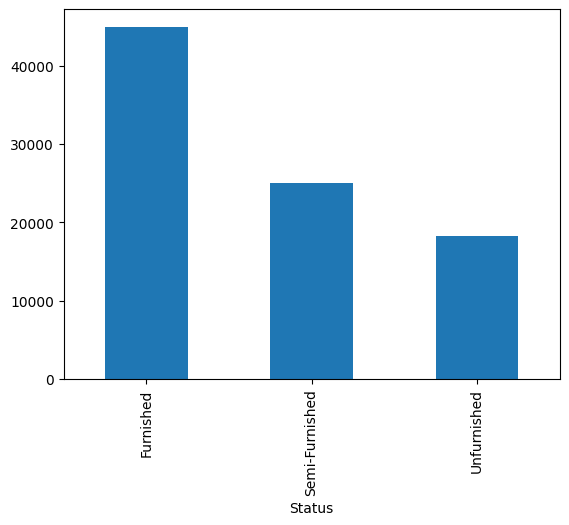

In [86]:
#status and price
df1.groupby('Status')['price'].median().plot(kind='bar')

<Axes: >

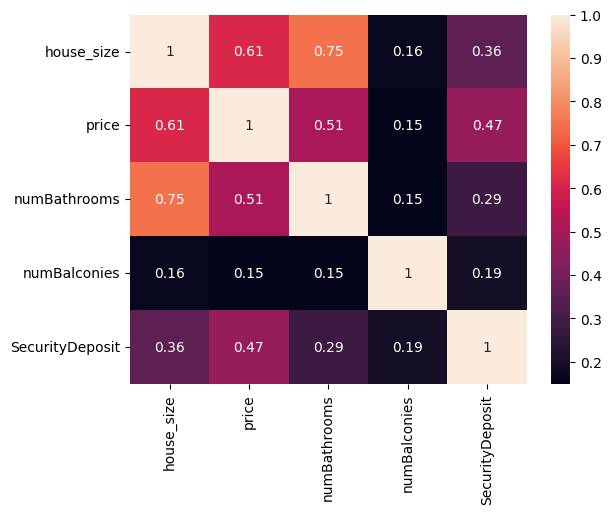

In [87]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)

In [88]:
from sklearn.compose import ColumnTransformer   # Data preprocessing

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder # Encoding types


from sklearn.metrics import r2_score,mean_absolute_error  # Model evaulation metrics


from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.svm import SVR


In [89]:
x=df1.drop(columns=['price'])
y=df1['price']

In [90]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

In [91]:
x_train['city'].value_counts()

,city
Mumbai,4013
Pune,3107
Hisar,8


In [92]:
x_train.head(1)

,house_type,house_size,location,city,numBathrooms,numBalconies,isNegotiable,SecurityDeposit,Status
4161,3_BHK_Apartment,1310,Kalyan West,Mumbai,3,2.0,No,0,Furnished


In [93]:

# Step 1: Column Transformer with encoding
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore'), [2, 3, 6]),
    ('tnf2', OrdinalEncoder(categories=[['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House',
                                         '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment',
                                         '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa',
                                         '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor',
                                         '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House',
                                         '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment',
                                         '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment',
                                         '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']],
                         handle_unknown='use_encoded_value', unknown_value=-1), [0]),
    ('tnf3', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']],
                            handle_unknown='use_encoded_value', unknown_value=-1), [8]),
], remainder='passthrough') # transform

In [94]:
# Step 2: Use Multiple Linear Regression instead of Gradient Boosting
step2 = LinearRegression()
# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])


In [95]:
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)
# Make predictions on the test data
y_pred = pipe.predict(x_test)
# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.6614131312692343
MAE: 17102.42474754782


In [96]:
y_pred

array([ -8563.38324054,  10007.24605531,  -1441.98875323, ...,
        25622.18228105,  91573.13705943, 210447.27624678])

In [97]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Step 1: Column Transformer with encoding
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore'), [2, 3, 6]),
    ('tnf2', OrdinalEncoder(categories=[['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House',
                                         '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment',
                                         '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa',
                                         '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor',
                                         '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House',
                                         '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment',
                                         '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment',
                                         '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']],
                         handle_unknown='use_encoded_value', unknown_value=-1), [0]),
    ('tnf3', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']],
                            handle_unknown='use_encoded_value', unknown_value=-1), [8]),
], remainder='passthrough')

In [98]:
# Step 2: Use Decision Tree Regressor
step2 = DecisionTreeRegressor()

# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [99]:
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

In [100]:
# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.7913227609884945
MAE: 9524.029748021552


In [101]:
# Step 1: Column Transformer with encoding
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore'), [2, 3, 6]),
    ('tnf2', OrdinalEncoder(categories=[['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House',
                                         '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment',
                                         '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa',
                                         '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor',
                                         '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House',
                                         '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment',
                                         '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment',
                                         '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']],
                         handle_unknown='use_encoded_value', unknown_value=-1), [0]),
    ('tnf3', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']],
                            handle_unknown='use_encoded_value', unknown_value=-1), [8]),
], remainder='passthrough')

In [102]:
# Step 2: Use Random Forest Regressor
step2 = RandomForestRegressor(n_estimators=100)
# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [103]:
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

In [104]:
# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8116819367689337
MAE: 9348.909433507406


In [105]:
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
# Step 1: Column Transformer with encoding
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore'), [2, 3, 6]),
    ('tnf2', OrdinalEncoder(categories=[['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House',
                                         '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment',
                                         '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa',
                                         '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor',
                                         '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House',
                                         '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment',
                                         '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment',
                                         '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']],
                         handle_unknown='use_encoded_value', unknown_value=-1), [0]),
    ('tnf3', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']],
                            handle_unknown='use_encoded_value', unknown_value=-1), [8]),
], remainder='passthrough')

# Step 2: Use StandardScaler to scale features before applying SVR
step2_scaler = StandardScaler()

# Step 3: Use SVR
step3 = SVR(kernel='rbf')  # You can choose different kernels, like 'linear', 'poly', etc.

# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2_scaler', step2_scaler),  # Apply scaling after encoding
    ('step3', step3)
])

# Fit the pipeline to the training data
pipe.fit(x_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(x_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: -0.07539762368515457
MAE: 27528.59094449541


In [107]:

# Step 1: Column Transformer with encoding
step1 = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, categories='auto', handle_unknown='ignore'), [2, 3, 6]),
    ('tnf2', OrdinalEncoder(categories=[['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House',
                                         '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment',
                                         '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa',
                                         '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor',
                                         '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House',
                                         '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment',
                                         '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment',
                                         '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']],
                         handle_unknown='use_encoded_value', unknown_value=-1), [0]),
    ('tnf3', OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']],
                            handle_unknown='use_encoded_value', unknown_value=-1), [8]),
], remainder='passthrough')

In [108]:
# Step 2: Use AdaBoost Regressor with DecisionTreeRegressor as base estimator
step2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100)

# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)
# Make predictions on the test data
y_pred = pipe.predict(x_test)
# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7882257920281946
MAE: 10575.63434766381


In [109]:
step1=ColumnTransformer(transformers=[('tnf1',OneHotEncoder(sparse_output=False,categories='auto',handle_unknown = 'ignore'),[2,3,6]),
('tnf2',OrdinalEncoder(categories = [['1_RK_Studio_Apartment', '1_BHK_Apartment', '1_BHK_Independent_House', '1_BHK_Independent_Floor', '1_BHK_Villa', '2_BHK_Apartment', '2_BHK_Independent_House', '2_BHK_Independent_Floor', '2_BHK_Villa', '3_BHK_Apartment', '3_BHK_Independent_House', '3_BHK_Independent_Floor', '3_BHK_Villa', '4_BHK_Apartment', '4_BHK_Independent_House', '4_BHK_Independent_Floor', '4_BHK_Villa', '5_BHK_Apartment', '5_BHK_Independent_House', '5_BHK_Villa', '6_BHK_Apartment', '6_BHK_Independent_House', '6_BHK_Villa', '6_BHK_penthouse']
],handle_unknown='use_encoded_value', unknown_value=-1),[0]),
('tnf3',OrdinalEncoder(categories=[['Unfurnished', 'Semi-Furnished', 'Furnished']
],handle_unknown='use_encoded_value', unknown_value=-1),[8]),
],remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)
pipe = Pipeline([
('step1',step1),
('step2',step2)
])
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8342164154987768
MAE 10495.498739449155


In [110]:
import pickle
pickle.dump(df1,open('/content/dataf.pkl','wb'))
pickle.dump(pipe,open('/content/pipe1.pkl','wb'))

In [111]:
!pip install pandas==1.5.3

In [112]:
!pip install gradio

In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.3 MB/s eta 0:00:00


In [116]:
import sklearn
import xgboost
print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


Scikit-learn version: 1.6.1
XGBoost version: 2.1.4


In [ ]:
import streamlit as st
import gradio as gr
import pickle
import numpy as np
import math
# Load your model and data
pipe = pickle.load(open('/content/pipe1.pkl', 'rb'))
dataf = pickle.load(open('/content/dataf.pkl', 'rb'))
def predict_rent_price(house_type, house_size, location, city, numBathrooms,
       numBalconies, isNegotiable, SecurityDeposit, Status):
    query = np.array([house_type, house_size, location, city, numBathrooms,
       numBalconies, isNegotiable, SecurityDeposit, Status])
    query = query.reshape(1, 9)
    prediction = pipe.predict(query)[0]
    return round(prediction)
# Define the inputs and outputs for the Gradio interface
inputs = [
    gr.Dropdown(choices=dataf['house_type'].unique().tolist(), label="House Type"),
    gr.Number(label="House Size in Sqft"),
    gr.Dropdown(choices=dataf['location'].unique().tolist(), label="Location"),
    gr.Dropdown(choices=dataf['city'].unique().tolist(), label="City"),
    gr.Number(label="Number of Bathrooms"),
    gr.Number(label="Number of Balconies"),

    gr.Dropdown(choices=dataf['isNegotiable'].unique().tolist(), label="IsNegotiable"),
    gr.Number(label="SecurityDeposit"),
    gr.Dropdown(choices=dataf['Status'].unique().tolist(), label="Status"),]
outputs = gr.Textbox(label="Predicted Price")
# Create and launch the Gradio interface
gr.Interface(fn=predict_rent_price, inputs=inputs, outputs=outputs, title="House Rent Prediction ").launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://0dea8830acbfa2a746.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/util